In [122]:
# import libraries and run a few checks
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import seaborn as sns
sns.set(palette='Paired', style='white')

import warnings 
warnings.filterwarnings('ignore')

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# utility function to save figures for presentation
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load dataset

In [123]:
dataset = pd.read_csv('TMBD Movie Dataset.csv')

In [124]:
dataset = dataset.reset_index()

In [125]:
pd.set_option('display.max_columns', None)
dataset.head(5)

,index,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level
0,0,0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,High
1,1,1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,High
2,2,2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,High
3,3,3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,High
4,4,4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,High


In [126]:
dataset.shape

(1287, 25)

### remove nan

In [127]:
missing_values = dataset.isna().sum()

In [128]:
missing_values 

index                   0
Unnamed: 0              0
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
popularity_level        1
dtype: int64

remove the NaN from target group : popularity_level

In [129]:
dataset = dataset.loc[dataset["popularity_level"].isna() == False]

## Exploratory data analysis

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1286
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1286 non-null   int64  
 1   Unnamed: 0            1286 non-null   int64  
 2   id                    1286 non-null   int64  
 3   imdb_id               1286 non-null   object 
 4   popularity            1286 non-null   float64
 5   budget                1286 non-null   float64
 6   revenue               1286 non-null   float64
 7   original_title        1286 non-null   object 
 8   cast                  1286 non-null   object 
 9   homepage              1286 non-null   object 
 10  director              1286 non-null   object 
 11  tagline               1286 non-null   object 
 12  keywords              1286 non-null   object 
 13  overview              1286 non-null   object 
 14  runtime               1286 non-null   int64  
 15  genres               

In [131]:
# numerical columns
num_cols = dataset.describe().columns.to_list()[:-1]
dataset.describe()

,index,Unnamed: 0,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1286.000000,1286.000000,1286.000000,1286.000000,1.286000e+03,1.286000e+03,1286.000000,1286.000000,1286.000000,1286.000000,1.286000e+03,1.286000e+03,1.286000e+03
mean,642.792379,4124.335148,52439.889580,1.787403,5.202060e+07,1.763285e+08,110.257387,947.953344,6.280093,2007.012442,5.465058e+07,1.992828e+08,1.243079e+08
std,371.739128,2672.428163,74359.358936,2.172417,5.516344e+07,2.538964e+08,18.809796,1255.722722,0.795968,8.061910,5.527116e+07,2.969429e+08,2.184179e+08
min,0.000000,0.000000,11.000000,0.015997,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01,-4.139124e+08
25%,321.250000,1971.500000,5851.250000,0.666532,1.400000e+07,2.560695e+07,97.000000,179.250000,5.800000,2005.000000,1.519180e+07,2.754364e+07,3.133386e+06
50%,642.500000,3522.500000,20113.000000,1.152386,3.200000e+07,8.212852e+07,107.000000,439.500000,6.300000,2009.000000,3.557164e+07,8.689619e+07,4.532795e+07
75%,964.750000,6554.750000,62198.750000,2.127070,7.000000e+07,2.140870e+08,121.000000,1173.500000,6.800000,2011.000000,7.633686e+07,2.351241e+08,1.471200e+08
max,1286.000000,10760.000000,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [132]:
# non-numerical columns
cat_cols = dataset.describe(include=['O']).columns.to_list()
dataset.describe(include=['O'])

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date,popularity_level
count,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286
unique,1286,1279,1277,1265,788,1282,1271,1286,496,1137,1080,4
top,tt0369610,Halloween,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.thehungergames.movie/,John Carpenter,Love is a force of nature.,duringcreditsstinger,Twenty-two years after the events of Jurassic ...,Drama,Walt Disney Pictures|Pixar Animation Studios,2014-12-25,High
freq,1,2,3,4,12,2,6,1,76,12,5,322


In [133]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

In [134]:
num_cols.append('release_date')

In [135]:
num_cols.remove('Unnamed: 0')
num_cols.remove('id')

### Visualization of numerical features

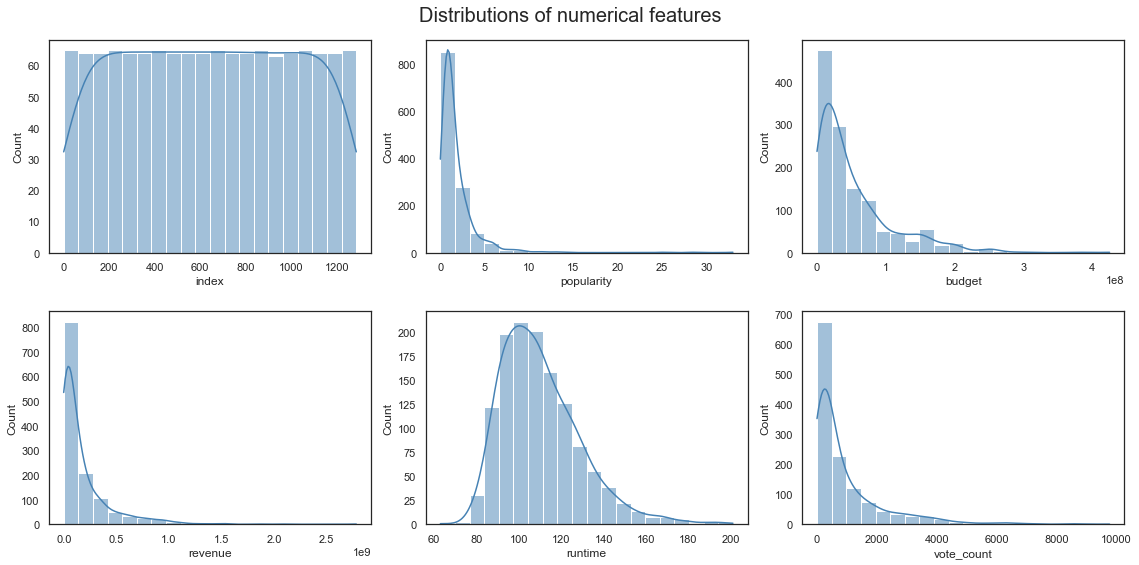

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
for col, ax in zip(num_cols, axes.flat):
    sns.histplot(x=col, data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('Distributions of numerical features', fontsize=20)
plt.tight_layout(h_pad=2)

#save_fig("num_cols_distribution_plots")

popularity is a target feature, we consider budgetm revenue, runtime, vote_count and vote_average as training features

In [137]:
training_features = ["budget", "revenue","runtime","vote_count","vote_average"]

### Vsualization of target groups

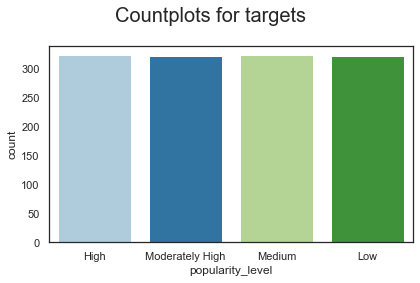

In [138]:
# see target spread
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.countplot(x=dataset["popularity_level"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()

target groups are evenly spread, this is a balanced dataset

### Visualization of movie over time

In [139]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

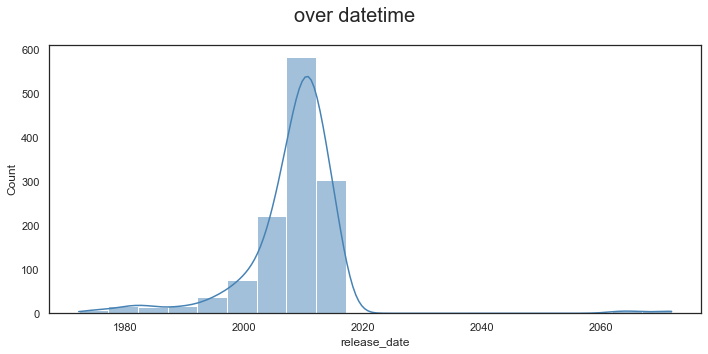

In [140]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.histplot(x='release_date', data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('over datetime', fontsize=20)
plt.tight_layout(h_pad=2)

notice that there are erroneous entries, we nee to correct the entries based on their years

In [141]:
max_date_threshold =  pd.to_datetime('2024-03-30')

In [142]:
dataset.loc[dataset["release_date"] >= max_date_threshold]

,index,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level
1259,1259,9849,646,tt0055928,3.170651,1100000.0,59600000.0,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,http://www.mgm.com/view/movie/566/Dr.-No/,Terence Young,NOW meet the most extraordinary gentleman spy ...,london|england|assassination|spy|casino,"In the film that launched the James Bond saga,...",110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2062-10-04,560,6.7,1962,7.929294e+06,4.296236e+08,58500000.0,High
1260,1260,9881,658,tt0058150,3.153791,3500000.0,124900000.0,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,http://www.mgm.com/view/movie/760/Goldfinger/,Guy Hamilton,Everything he touches turns into excitement!,secret organization|secret intelligence servic...,Special agent 007 (Sean Connery) comes face to...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2064-09-17,602,7.0,1964,2.460594e+07,8.780804e+08,121400000.0,High
1261,1261,9884,704,tt0058182,0.812194,500000.0,1000549.0,A Hard Day's Night,John Lennon|Paul McCartney|George Harrison|Rin...,http://www.thebeatles.com/film/hard-days-night,Richard Lester,"The Beatles, starring in their first full-leng...",adolescence|culture clash|press conference|beh...,"Capturing John Lennon, Paul McCartney, George ...",88,Comedy|Music,Proscenium Films|Walter Shenson Films|Maljack ...,2064-07-06,92,6.9,1964,3.515134e+06,7.034127e+06,500549.0,Medium
1262,1262,9925,681,tt0066995,1.755117,7200000.0,116000000.0,Diamonds Are Forever,Sean Connery|Jill St. John|Charles Gray|Lana W...,http://www.mgm.com/view/movie/529/Diamonds-Are...,Guy Hamilton,The man who made 007 a household number,satellite|plastic surgery|smuggling|murder|ext...,Diamonds are stolen only to be sold again in t...,120,Adventure|Action|Thriller|Science Fiction,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2071-12-13,331,6.2,1971,3.877340e+07,6.246826e+08,108800000.0,Moderately High
1263,1263,9927,984,tt0066999,0.885391,4000000.0,35976000.0,Dirty Harry,Clint Eastwood|Harry Guardino|Reni Santoni|Joh...,http://www.warnerbros.com/dirty-harry/,Don Siegel,Detective Harry Callahan. He doesn't break mur...,ambush|san francisco|detective|ransom|stadium,"When a madman dubbed the ""Scorpio Killer"" terr...",102,Action|Crime|Thriller,Warner Bros.|Malpaso Company,2071-12-22,300,7.2,1971,2.154078e+07,1.937378e+08,31976000.0,Medium
1264,1264,9932,636,tt0066434,0.627942,777000.0,2437000.0,THX 1138,Robert Duvall|Donald Pleasence|Don Pedro Colle...,http://www.thx1138movie.com/,George Lucas,Visit the future where love is the ultimate cr...,prison|drug addiction|hearing|totalitarian reg...,People in the future live in a totalitarian so...,86,Drama|Mystery|Science Fiction|Thriller,American Zoetrope|Warner Bros.,2071-03-11,125,6.1,1971,4.184296e+06,1.312372e+07,1660000.0,Low
1265,1265,9951,25188,tt0067328,0.369308,1300000.0,29133000.0,The Last Picture Show,Timothy Bottoms|Jeff Bridges|Cybill Shepherd|B...,http://www.filmsite.org/lastp.html,Peter Bogdanovich,"Anarene, Texas, 1951. Nothing much has changed...",new love|graduation|high school graduation|poo...,The coming of age of a youth named Sonny in a ...,118,Drama,Columbia Pictures Corporation|BBS Productions,2071-10-03,42,7.0,1971,7.000753e+06,1.568869e+08,27833000.0,Low
1270,1270,10131,430,tt0055256,0.303783,3000000.0,4000000.0,"One, Two, Three",James Cagney|Liselotte Pulver|Horst Buchholz|P...,"http://en.wikipedia.org/wiki/One,_Two,_Three",Billy Wilder,Billy Wilder's Explosive New Comedy,berlin|prison|clerk|atlanta|cold war,"One, Two, Three â€“ A scorching business comed...",115,Comedy|Family,The Mirisch Corporation,2061-12-15,30,7.5,1961,2.188458e+07,2.917944e+07,1000000.0,Low
1278,1278,10401,667,tt0062512,1.554808,9500000.0,111584787.0,You Only Live Twice,Sean Co

In [143]:
for index, row in dataset.loc[dataset["release_date"] >= max_date_threshold].iterrows():
    dataset.at[index,"release_date"] = pd.to_datetime(f'{str(row["release_year"])}-{str(row["release_date"].month)}-{str(row["release_date"].day)}')

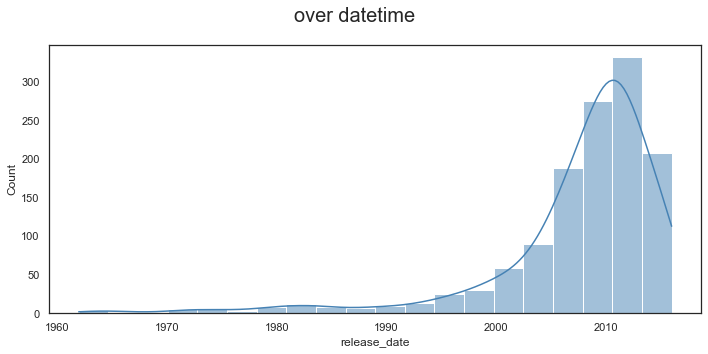

In [144]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.histplot(x='release_date', data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('over datetime', fontsize=20)
plt.tight_layout(h_pad=2)

### Visualize target group over release_year

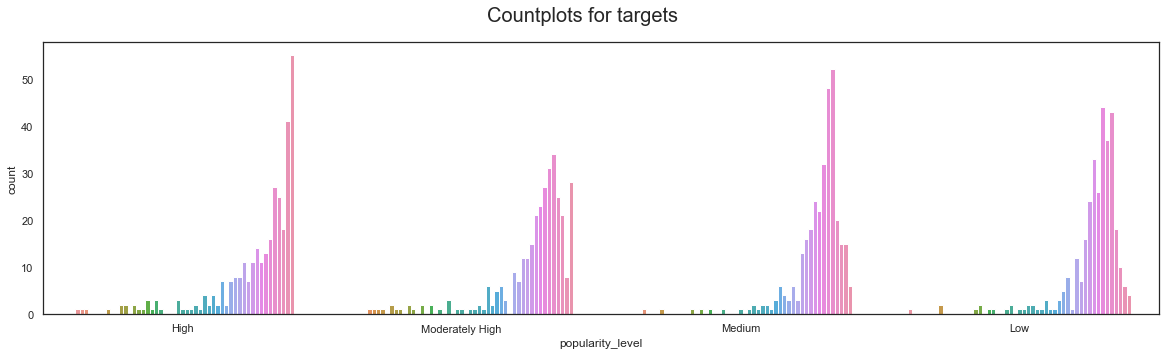

In [145]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["release_year"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
ax.legend_.remove()

we can see that there are minor difference across years (pink is most recent, with blue and orange in the past), movies created recently seems to have higher ratings, this could be due to better visual effects etc, however we should not consider this as training feature because movies are compared to each other within the same timeframe, hence it is more likely that as years goes ratings are higher due to other factors

hence we need to take care of this using time series kfold later on

### Extracting month in datetime and visualize

In [146]:
dataset["release_month"] = dataset["release_date"].apply(lambda x : x.month)

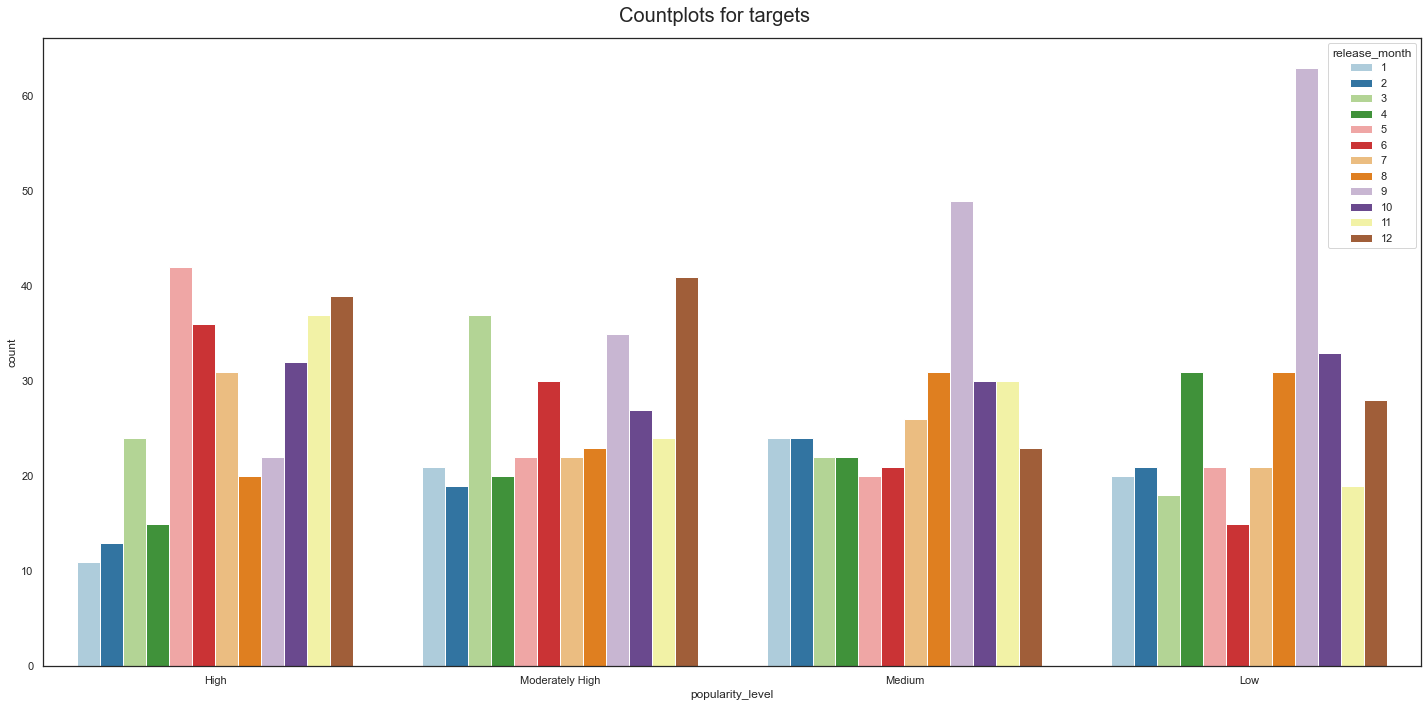

In [147]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.countplot(x=dataset["popularity_level"], hue=dataset["release_month"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we see some months have abnomally low /medium ratings such as september, while some have higher ratings such as may, this may be due to many unknown but chronic factors hence this could be us as a training feature

In [148]:
training_features.append("release_month")

### Handling categorical features

In [149]:
dataset[cat_cols].head(1)

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date,popularity_level
0,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,High


In [150]:
dataset.iloc[0]["overview"]

'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.'

from the above, we can see that we need to do some feature extraction from the columns to generate meaningful categories

- length of title - The length of a movie title may influence how audiences perceive the film. A shorter, catchy title might be more memorable and easier to recall, potentially leading to increased interest and viewership. On the other hand, a longer title might convey more information about the movie's content or theme, which could attract specific audiences but might also be seen as less accessible to others.

- length of tagline - Short and catchy taglines are often more memorable and impactful. They can succinctly capture the essence of the movie and leave a lasting impression on audiences. A well-crafted short tagline might generate curiosity and interest, potentially leading to higher ratings as viewers are intrigued to watch the film. The length of a tagline can affect its ability to communicate the movie's theme or premise effectively. A concise tagline can quickly convey the central idea or emotion of the film, making it easier for audiences to understand what to expect. However, if a tagline is too short or cryptic, it might fail to provide enough information, leading to confusion or misinterpretation.

- length of overview - A succinct overview that effectively summarizes the movie's plot, themes, and key elements can enhance audience understanding and engagement. If the overview is too lengthy or convoluted, it may fail to communicate the movie's core aspects clearly, potentially leading to confusion and dissatisfaction among viewers. The length of the overview can influence audience expectations regarding the movie's content and quality. A well-written and comprehensive overview can provide insight into what viewers can expect from the film, helping to manage expectations and increase the likelihood of a positive reception. Conversely, a brief or vague overview may not adequately convey the movie's appeal, leading to disappointment and lower ratings.

In [151]:
def getlength(x):
    words = x.split()
    return len(words)

In [152]:
dataset["title length"] = dataset["original_title"].apply(lambda x: getlength(x))
dataset["tagline length"] = dataset["tagline"].apply(lambda x: getlength(x))
dataset["overview length"] = dataset["overview"].apply(lambda x: getlength(x))

In [153]:
colA= ["title length","tagline length","overview length"] 

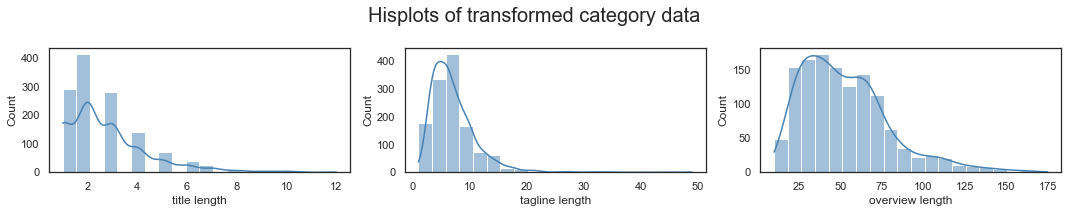

In [154]:
sns.set_palette('Paired')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    sns.histplot(x=colA[i],data = dataset, bins = 20, kde = True, ax=ax, color= 'steelblue')
fig.suptitle('Hisplots of transformed category data', fontsize=20)
plt.tight_layout()

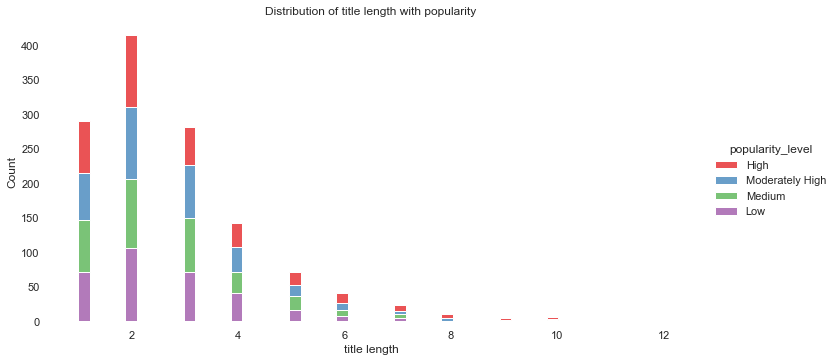

In [155]:
sns.displot(data=dataset, kind='hist', x='title length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of title length with popularity');

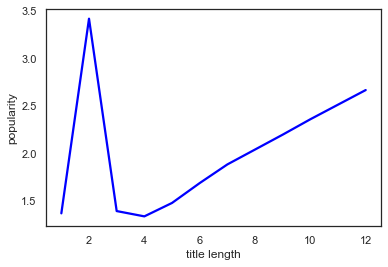

In [156]:
sns.regplot(data=dataset, x='title length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

title length not useful

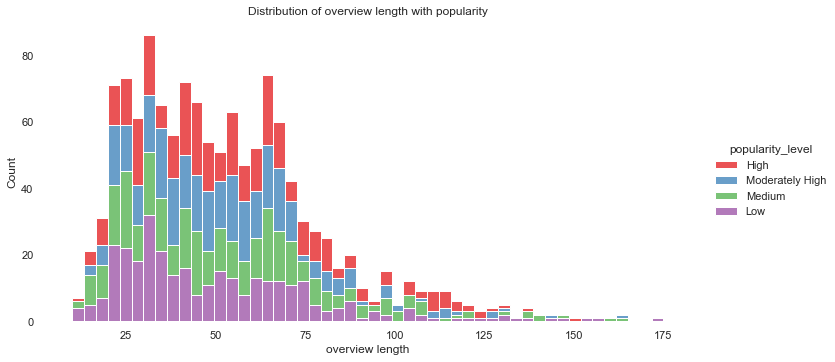

In [157]:
sns.displot(data=dataset, kind='hist', x='overview length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of overview length with popularity');

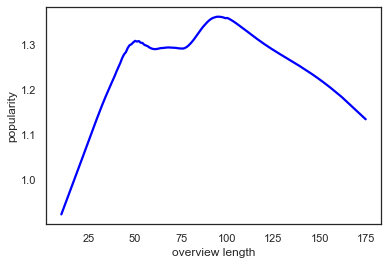

In [158]:
sns.regplot(data=dataset, x='overview length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

overview length might be useful

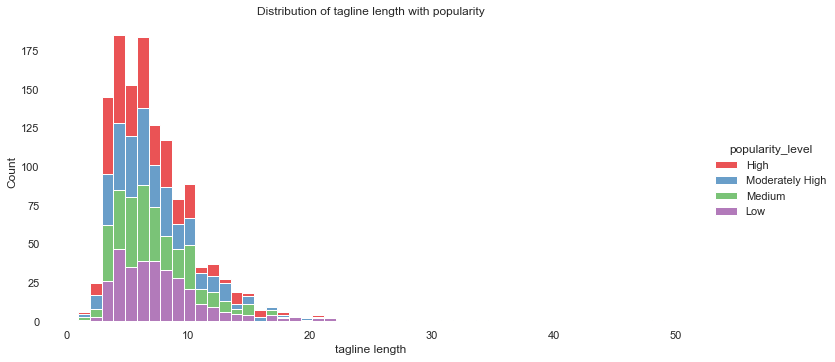

In [159]:
sns.displot(data=dataset, kind='hist', x='tagline length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of tagline length with popularity');

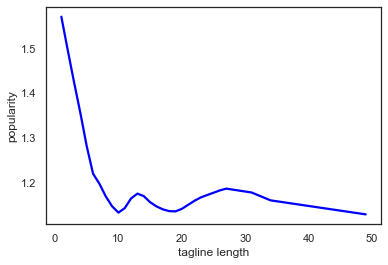

In [160]:
sns.regplot(data=dataset, x='tagline length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

tagline length is very useful, one reason is that short tagline is more catchy and memorizable and impressionable

In [161]:
#training_features.append("title length")
training_features.append("tagline length")
training_features.append("overview length")

### One hot encoding important category features

Next, we one hot encode the following

- cast
- director
- keywords
- genres
- production_companies

In [162]:
def onehotencode(dataset,col):
    df = pd.DataFrame()
    df[col] = dataset[col].str.split('|')
    one_hot_encoded = pd.get_dummies(df[col].apply(pd.Series).stack()).sum(level=0)
    return one_hot_encoded

In [163]:
OHE_cast = onehotencode(dataset,"cast")
OHE_cast = onehotencode(dataset,"cast")

In [164]:
dataset.iloc[OHE_cast.loc[OHE_cast["Chris Pratt"] != 0].index]

,index,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level,release_month,title length,tagline length,overview length
0,0,0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,High,6,2,4,26
94,94,630,118340,tt2015381,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,marvel comic|spaceship|space|scene during end ...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08,6.033124e+08,High,7,4,4,28
211,211,1454,10521,tt0901476,1.074072,30000000.0,1.146635e+08,Bride Wars,Anne Hathaway|Kate Hudson|Bryan Greenberg|Chri...,http://www.bridewars.com,Gary Winick,May the best bride win,bride|friendship|engagement|rivalry|wedding,Two best friends become rivals when their resp...,89,Comedy,Dune Entertainment|Regency Enterprises|Fox 200...,2009-01-09,501,5.8,2009,3.049201e+07,1.165440e+08,8.466346e+07,Medium,1,2,5,16
598,598,3448,63492,tt0770703,1.120851,20000000.0,3.042610e+07,What's Your Number?,Chris Evans|Anna Faris|Martin Freeman|Chris Pr...,http://www.whatsyournumbermovie.com/,Mark Mylod,Ally's looking for the best ex of her life.,based on novel|loser|magazine|womanizer|mission,Ally Darling (Anna Faris) is realizing she's a...,106,Comedy|Romance,Regency Enterprises|Contrafilm|New Regency Pic...,2011-09-30,390,6.2,2011,1.938796e+07,2.949500e+07,1.042610e+07,Medium,9,3,9,81
605,605,3457,60308,tt1210166,1.081676,50000000.0,1.102062e+08,Moneyball,Brad Pitt|Jonah Hill|Robin Wright|Philip Seymo...,http://www.moneyball-movie.com/,Bennett Miller,What are you really worth?,underdog|based on novel|baseball|teamwork|partner,The story of Oakland Athletics general manager...,133,Drama,Columbia Pictures|Scott Rudin Productions,2011-09-22,899,6.9,2011,4.846990e+07,1.068337e+08,6.020622e+07,Medium,9,1,5,28
759,759,4414,97630,tt1790885,1.554441,40000000.0,1.328207e+08,Zero Dark Thirty,Jessica Chastain|Jason Clarke|Mark Strong|Joel...,http://www.zerodarkthirty-movie.com/site/,Kathryn Bigelow,The Greatest Manhunt in History,assassination|cia|hotel|terrorist|prisoner,A chronicle of the decade-long hunt for al-Qae...,157,Thriller|Drama|History,Columbia Pictures|Annapurna Pictures|First Lig...,2012-12-19,1240,6.5,2012,3.798977e+07,1.261457e+08,9.282072e+07,Moderately High,12,3,5,33
771,771,4446,72207,tt1195478,1.095479,30000000.0,5.390975e+07,The Five-Year Engagement,Emily Blunt|Alison Brie|Jason Segel|Rhys Ifans...,http://www.thefiveyearengagementmovie.com/,Nicholas Stoller,A comedy about the journey between popping the...,sex|san francisco|restaurant|frustration|chase,"Exactly one year after Tom meets Violet, he su...",124,Comedy,Universal Pictures|Dentsu|Relativity Media|Apa...,2012-04-27,319,5.6,2012,2.849233e+07,5.120048e+07,2.390975e+07,Medium,4,3,13,43


In [165]:
OHE_cast.shape

(1286, 2973)

the dimension of One hot encoded feature is too large and sparse, this is not good for subsequent training, hence we need to conduct dimensionality reduction
- PCA
- SelectKBest

### Dimension reduction - PCA

In [166]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=OHE_cast.shape[0])  # Specify the number of components you want to reduce to
pca_result = pca.fit_transform(OHE_cast)

# Create DataFrame to store PCA results
pca_df = pd.DataFrame(data=pca_result)

In [167]:
pca_df["popularity_level"] = dataset["popularity_level"]

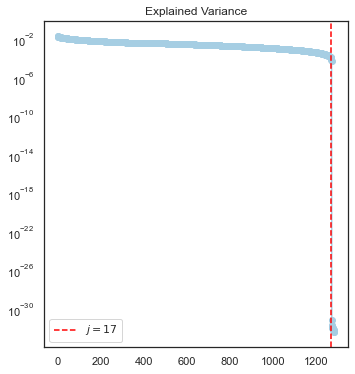

In [168]:
fig, ax= plt.subplots(figsize=(12, 6))

plt.subplot(121)
plt.semilogy(pca.explained_variance_, '-o')
plt.axvline(x=1270, c='r', ls='--', label=r'$j=17$')
plt.title('Explained Variance')
# plt.xlim(0, 10)
# plt.ylim( 10 ** -4,  1)
plt.legend()

notice that the explained variance do not drop at first few principal components, this indicates PCA is not ideal in this context, nevertheless we try to visualize PCA results

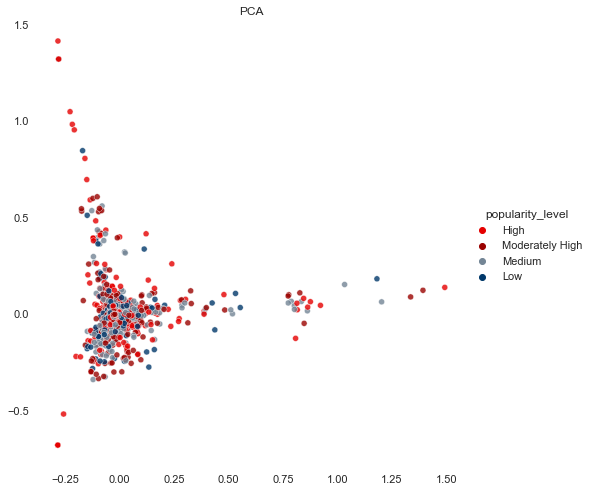

In [169]:
sns.relplot(x=pca_df[0], y=pca_df[1], hue=pca_df["popularity_level"], kind='scatter', height=7, alpha=0.8, 
           palette={'Low':sns.xkcd_rgb['marine blue'],
                    'Medium':sns.xkcd_rgb['steel'],
                    "Moderately High" : sns.xkcd_rgb['deep red'],
                    "High" : sns.xkcd_rgb["red"]
                   }
           )
plt.title('PCA')
plt.xlabel('')
plt.ylabel('')
plt.box(False);

### Dimension reduction - SelectKbest

In [170]:
from sklearn.feature_selection import SelectKBest, chi2

# Perform feature selection using SelectKBest with chi-squared test
k = 50 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_cast, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_cast = OHE_cast.columns[selected_indices]
selected_cast = selected_cast.tolist()

In [171]:
selected_cast

['Alicia Vikander',
 'Angela Bassett',
 'Arnold Schwarzenegger',
 'Ben Stiller',
 'Brooke Shields',
 'Carrie Fisher',
 'Chris Hemsworth',
 'Christian Bale',
 'Clifton Collins, Jr.',
 'Daniel Craig',
 'Daniel Radcliffe',
 'David Wenham',
 'Denis Leary',
 'Emma Watson',
 'Graham McTavish',
 'Harrison Ford',
 'Harry Connick Jr.',
 'Helena Bonham Carter',
 'Hugo Weaving',
 'Ian McDiarmid',
 'Ian McKellen',
 'Jennifer Hudson',
 'Johnny Depp',
 'Jordana Brewster',
 'Josh Duhamel',
 'Julia Roberts',
 'Lea Thompson',
 'Leonardo DiCaprio',
 'Lily Collins',
 'Mark Hamill',
 'Michael Caine',
 'Michael J. Fox',
 'Natalie Portman',
 'Orlando Bloom',
 'Paul Schneider',
 'Ray Romano',
 'Richard Armitage',
 'Roger Moore',
 'Rupert Grint',
 'Sacha Baron Cohen',
 'Sara Paxton',
 'Scarlett Johansson',
 'Seth Rogen',
 'Sheri Moon Zombie',
 'Spencer Breslin',
 'Stellan SkarsgÃ¥rd',
 'Taylor Lautner',
 'Theo James',
 'Timothy Spall',
 'Tom Cruise']

observing the selected top 50 cast, we can easily observe that they are all names of recognizable famous actors, lets count the movies they acted in


In [172]:
def countmovies(x, df):
    count = df.loc[df[x] != 0][x].count()
    return count

In [173]:
df_cast = pd.DataFrame(selected_cast, columns= ["cast"])
df_cast["number of movies"] = df_cast["cast"].apply(lambda x: countmovies(x,OHE_cast))
df_cast = df_cast.sort_values(by = "number of movies", ascending = False)

In [174]:
df_cast

,cast,number of movies
15,Harrison Ford,14
49,Tom Cruise,13
42,Seth Rogen,13
41,Scarlett Johansson,13
22,Johnny Depp,13
7,Christian Bale,12
32,Natalie Portman,11
30,Michael Caine,11
27,Leonardo DiCaprio,10
25,Julia Roberts,10


In [175]:
def getpopcast(x, indexlist):
    if x in indexlist:
        return 1
    else:
        return 0

In [176]:
mlist = []
for cast in df_cast['cast'].tolist():
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

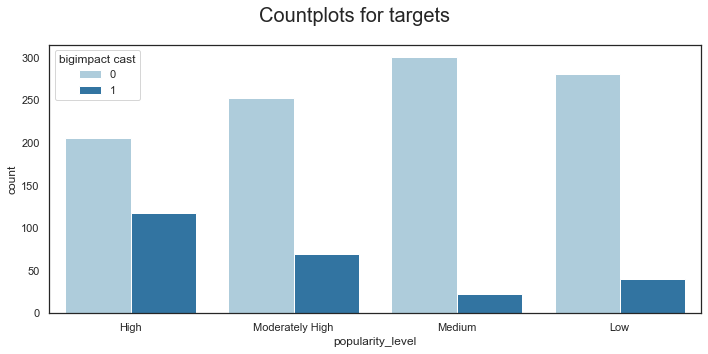

In [177]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the significance of these top 10 actors are that they either acted in very good movies or very bad movies

- because kbest also select bad actors, we need to account for this

In [178]:
badcast = []
for casts in dataset.loc[(dataset["bigimpact cast"] != 0)&(dataset["popularity_level"] == "Low")]["cast"].values:
    casts = casts.split("|")
    badcast.append(casts)
badcast = [item for sublist in badcast for item in sublist]

In [179]:
badcast = set(badcast)

In [180]:
badcast2 = {}
for cast in df_cast['cast'].tolist():
    if cast in badcast:
        index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
        badcast2[cast] = dataset.iloc[index]["popularity"].mean()

In [181]:
badcast2

{'Seth Rogen': 1.33015746153846,
 'Scarlett Johansson': 4.082079230769231,
 'Natalie Portman': 2.866504181818182,
 'Leonardo DiCaprio': 4.3392076,
 'Julia Roberts': 1.442462599999999,
 'Daniel Radcliffe': 3.8009481111111114,
 'Emma Watson': 4.110613555555556,
 'Daniel Craig': 2.997710111111112,
 'Angela Bassett': 2.17389575,
 'Sara Paxton': 0.4778716666666667,
 'Spencer Breslin': 0.45138666666666666,
 'Sheri Moon Zombie': 0.52835,
 'Harry Connick Jr.': 0.469279,
 'Jennifer Hudson': 0.5564393333333334,
 'Clifton Collins, Jr.': 0.40007966666666667,
 'Paul Schneider': 0.5290039999999999,
 'Jordana Brewster': 0.5131473333333334,
 'Brooke Shields': 0.369615}

as we can see, some popular cast are in the bad cast candidates, we need to remove them. we keep cast with average popularity of less than dataset's average in bad cast list

In [194]:
final_badcast = []
final_goodcast = []
for i,v in badcast2.items():
    if v < dataset["popularity"].mean():
        final_badcast.append(i)
    else:
        final_goodcast.append(i)

In [195]:
mlist = []
for cast in final_badcast:
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

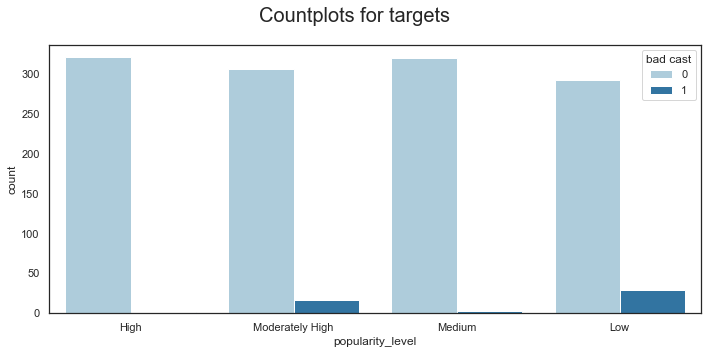

In [196]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

from the above, we observe that bad cast is not a useful feature, this may be because having bad cast does not mean movie cannot have good cast as seen in the moderately high group, furthermore bad cast account for low percentage of Low ratings

### Dimension reduction - based on prior knowledge to get good cast

based on prior knowledge, we know that actors that acted in more movies are likely more popular and movies tend to have better ratings, so we are also interested actors that acted in many movies, we set the threshold at top 10 actors

In [185]:
all_cast = OHE_cast.columns.tolist()
df_allcast = pd.DataFrame(all_cast, columns= ["cast"])
df_allcast["number of movies"] = df_allcast["cast"].apply(lambda x: countmovies(x,OHE_cast))
df_allcast = df_allcast.sort_values(by = "number of movies", ascending = False)

In [186]:
df_allcast.head(100)

,cast,number of movies
1933,Matt Damon,22
1900,Mark Wahlberg,19
2519,Samuel L. Jackson,17
195,Anne Hathaway,16
364,Brad Pitt,16
...,...,...
2522,Sandra Bullock,9
2614,Shia LaBeouf,9
1530,Judi Dench,9
2187,Olivia Wilde,9


we will cut off at 10 movies

In [187]:
for cast in df_allcast.head(100)["cast"]:
    if df_allcast.loc[df_allcast["cast"] == cast]["number of movies"].values[0] >10:
        final_goodcast.append(cast)
final_goodcast = list(set(final_goodcast))
final_goodcast

['Tom Cruise',
 'John Goodman',
 'Ryan Reynolds',
 'Jude Law',
 'George Clooney',
 'Jennifer Aniston',
 'Daniel Craig',
 'Ben Affleck',
 'Mark Wahlberg',
 'Jonah Hill',
 'Brendan Gleeson',
 'Charlize Theron',
 'Nicolas Cage',
 'Angelina Jolie',
 'Morgan Freeman',
 'Cate Blanchett',
 'Anne Hathaway',
 'Josh Brolin',
 'Colin Farrell',
 'Julianne Moore',
 'Rachel Weisz',
 'Owen Wilson',
 'Bradley Cooper',
 'Kate Winslet',
 'Hugh Jackman',
 'Scarlett Johansson',
 'Steve Carell',
 'Samuel L. Jackson',
 'Bill Nighy',
 'Jessica Chastain',
 'Brad Pitt',
 'Robert Downey Jr.',
 'Steve Buscemi',
 'Robert De Niro',
 'Guy Pearce',
 'Joseph Gordon-Levitt',
 'Dwayne Johnson',
 'Jason Bateman',
 'Paul Rudd',
 'Johnny Depp',
 'Christian Bale',
 'Jason Statham',
 'Daniel Radcliffe',
 'Emma Watson',
 'James Franco',
 'Ralph Fiennes',
 'Tom Hanks',
 'Gwyneth Paltrow',
 'Natalie Portman',
 'Russell Crowe',
 'Elizabeth Banks',
 'Vin Diesel',
 'Liam Neeson',
 'Matt Damon',
 'Susan Sarandon',
 'Cameron Diaz',

In [188]:
OHE_cast[final_goodcast]

,Tom Cruise,John Goodman,Ryan Reynolds,Jude Law,George Clooney,Jennifer Aniston,Daniel Craig,Ben Affleck,Mark Wahlberg,Jonah Hill,Brendan Gleeson,Charlize Theron,Nicolas Cage,Angelina Jolie,Morgan Freeman,Cate Blanchett,Anne Hathaway,Josh Brolin,Colin Farrell,Julianne Moore,Rachel Weisz,Owen Wilson,Bradley Cooper,Kate Winslet,Hugh Jackman,Scarlett Johansson,Steve Carell,Samuel L. Jackson,Bill Nighy,Jessica Chastain,Brad Pitt,Robert Downey Jr.,Steve Buscemi,Robert De Niro,Guy Pearce,Joseph Gordon-Levitt,Dwayne Johnson,Jason Bateman,Paul Rudd,Johnny Depp,Christian Bale,Jason Statham,Daniel Radcliffe,Emma Watson,James Franco,Ralph Fiennes,Tom Hanks,Gwyneth Paltrow,Natalie Portman,Russell Crowe,Elizabeth Banks,Vin Diesel,Liam Neeson,Matt Damon,Susan Sarandon,Cameron Diaz,Woody Harrelson,Angela Bassett,Michael Caine,Harrison Ford,Ewan McGregor,Jeff Bridges,Leonardo DiCaprio,Seth Rogen
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


the reduced feature still has extremely high dimensions and sparse, hence we will need to transform it, we will categorize all movies with the actors present as 1 and without as 0

In [189]:
mlist = []
for cast in final_goodcast:
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

In [190]:
dataset["popular cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

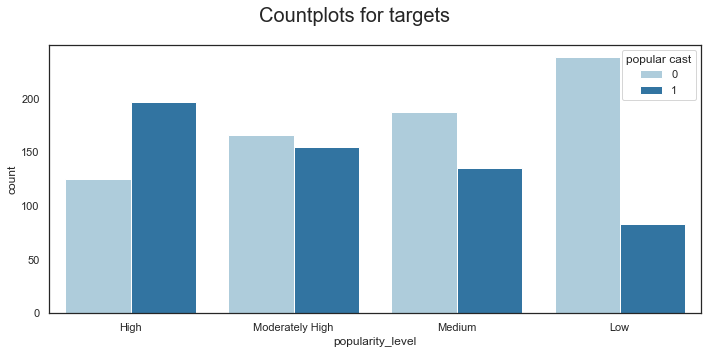

In [191]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["popular cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the above plot show that we have successfully extracted a usable feature from cast

In [192]:
training_features.append("popular cast")

In [193]:
#num: [budget, revenue, runtime, vote_count, vote_average, title length, tagline length, overview length]
#cat: [release month, popular cast]
dataset[training_features]

,budget,revenue,runtime,vote_count,vote_average,release_month,tagline length,overview length,popular cast
0,150000000.0,1.513529e+09,124,5562,6.5,6,4,26,0
1,150000000.0,3.784364e+08,120,6185,7.1,5,4,110,1
2,110000000.0,2.952382e+08,119,2480,6.3,3,5,22,1
3,200000000.0,2.068178e+09,136,5292,7.5,12,5,26,1
4,190000000.0,1.506249e+09,137,2947,7.3,4,3,14,1
...,...,...,...,...,...,...,...,...,...
1282,7000000.0,1.617778e+08,121,293,6.1,7,5,27,0
1283,11000000.0,1.411957e+08,130,331,6.3,12,6,46,0
1284,7000000.0,8.197449e+07,142,258,6.4,12,11,55,0
1285,300000.0,7.000000e+07,91,522,7.3,10,5,30,0


### Preprocessing other cat variables

Now, we use the same methods to preprocess the other variables
- director
- keywords
- genres
- production_companies

In [ ]:
# conduct time series kfold